# Modelagem do relevo de embasamento - Parte do Embasamento

In [1]:
# Importando bibliotecas do python
import numpy as np
import matplotlib.pyplot as plt
import sys

In [2]:
# Path referente aa localizacao da pasta modules:
#sys.path.append('/home/rodbijani/Documents/UFF/graduacao/IC/BrunoLima/IC-UFF/modules') # pc do Bijani
sys.path.append('C:/Users/bruno/Documents/UFF/Projeto_Bijani/GitHub/IC-UFF/modules') # pc do Bruno

In [3]:
# Importando bibliotecas extras
import modeling
import prism

In [4]:
# Definindo variaveis relevantes para a modelagem do relevo do embasamento
# Definindo variaveis mais simples
n_prism = 120  # numero de prismas a serem utilizados
xmin = 0       # valor minimo dos limites horizontais do modelo
xmax = 60000   # valor maximo dos limites horizontais do modelo

# Definindo zmax e zmin dos prismas (topo e fundo)
p1 = 0.022*n_prism 
p2 = 0.15*n_prism
p3 = 0.16*n_prism
p4 = 0.28*n_prism
p5 = 0.585*n_prism
p6 = 0.717*n_prism
p7 = 0.725*n_prism
p8 = 0.98*n_prism
p9 = 0.985*n_prism

zmin_emb = [] # valores de profundidade dos topos dos prismas
zmax_emb = [] # valores de profundidade dos fundos dos prismas
for i in range (n_prism):
    zmax_emb.append(2000)
    if i < p1:
        zmin_emb.append(90) # se refere ao primeiro valor de profundidade do modelo
    elif i < p2:
        zmin_emb.append(400) # se refere ao segundo valor de profundidade do modelo
    elif i < p3:
        zmin_emb.append(800) # se refere ao terceiro valor de profundidade do modelo
    elif i < p4:
        zmin_emb.append(900) # se refere ao quarto valor de profundidade do modelo
    elif i < p5:
        zmin_emb.append(1999) # se refere ao quinto valor de profundidade do modelo
    elif i < p6:
        zmin_emb.append(900) # se refere ao sexto valor de profundidade do modelo
    elif i < p7:
        zmin_emb.append(700) # se refere ao setimo valor de profundidade do modelo
    elif i < p8:
        zmin_emb.append(400) # se refere ao oitavo valor de profundidade do modelo
    elif i < p9:
        zmin_emb.append(50) # se refere ao nono valor de profundidade do modelo
    elif i <= n_prism:
        zmin_emb.append(0) # se refere ao decimo valor de profundidade do modelo

# Convertendo zmax_emb e zmin_emb em arrays para poder usar a funcao 'multi_prism' abaixo
zmax_emb = np.array(zmax_emb)
zmin_emb = np.array(zmin_emb)

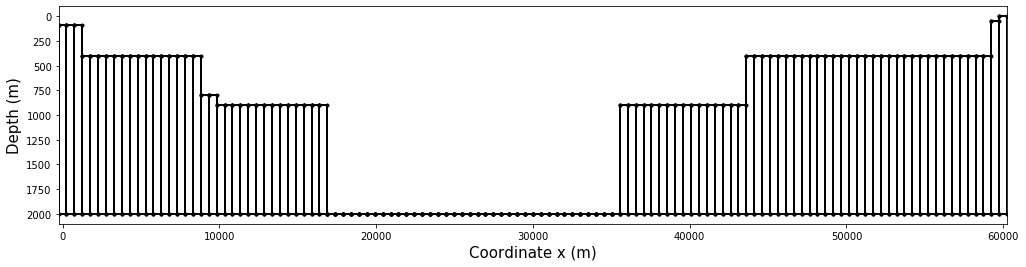

In [5]:
# Modelagem do relevo do embasamento
x_prism, x_coord, z_coord = modeling.multi_prism(n_prism, xmin, xmax, zmin_emb, zmax_emb, index='all')

In [6]:
# Calculando a componente vertical do campo gravitacional ao longo do modelo de relevo de embasamento
# Gerando as coordenadas dos pontos de observacoes
xo = np.linspace(xmin, xmax, n_prism) # coordenadas em x
yo = xo*0.0                           # coordenadas em y
zo = np.zeros(n_prism)                # coordenadas em z

# Considerando uma(s) desindade(s) para os prismas 
density = np.array([2.67])

# Informacoes referentes aos prismas
deltax = 2.0 * x_prism
deltay = 1000.0
top = zmin_emb
bottom = zmax_emb
xprism = xo
yprism = np.zeros(n_prism)

# Calculando a componente vertical do campo gravitacional
gz_emb = prism.prism3D_gz(xo, yo, zo, xprism, yprism, top, bottom, deltax, deltay, density)

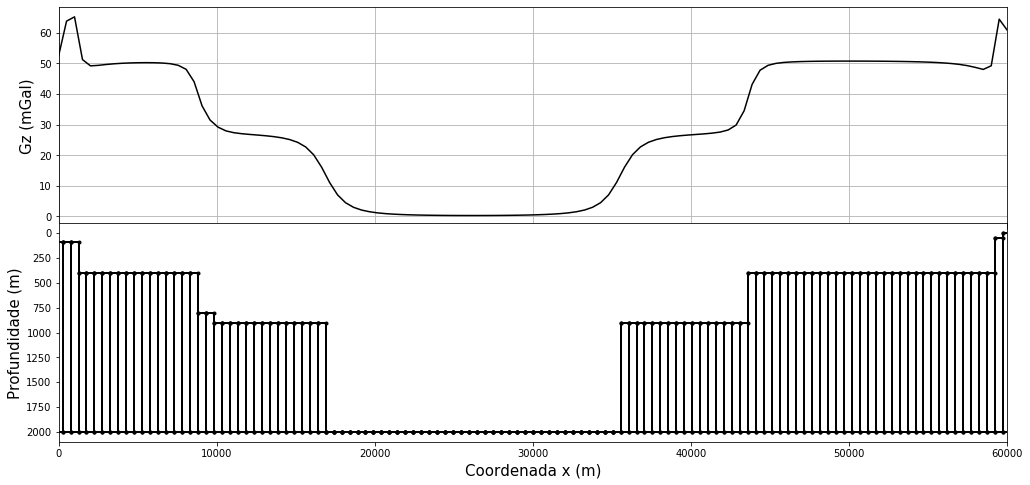

In [7]:
# Plotando
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(17, 8), facecolor='w', sharex=True, \
                                  gridspec_kw={'hspace': -0.01})

#ax1.plot(xo, gz, 'k-', label='Gz Calculado ', linewidth=2)
#ax1.legend(fontsize=12)
ax1.plot(xo, gz_emb, 'k-')
ax1.set_ylabel('Gz (mGal)', fontsize=15)
ax1.grid()
ax1.set_xlim(0,60000)

for i in range (n_prism):
    ax2.plot(x_coord[i], z_coord[i], ".-k", linewidth=2)

ax2.set_ylabel('Profundidade (m)', fontsize=15)
ax2.set_xlabel('Coordenada x (m)', fontsize=15)
ax2.invert_yaxis()
#plt.savefig('figs/Figura.png', format='png') # Salvando a figura em uma imagem PNG
plt.show( )

# Modelagem do relevo do embasamento - Parte do Sedimento

In [8]:
# Definindo variaveis relevantes para a modelagem da bacia
# Definindo variaveis mais simples
n_prism = 120  # numero de prismas a serem utilizados
xmin = 0       # valor minimo dos limites horizontais do modelo
xmax = 60000   # valor maximo dos limites horizontais do modelo

# Definindo zmax e zmin dos prismas (topo e fundo)
p1 = 0.022*n_prism 
p2 = 0.15*n_prism
p3 = 0.16*n_prism
p4 = 0.28*n_prism
p5 = 0.585*n_prism
p6 = 0.717*n_prism
p7 = 0.725*n_prism
p8 = 0.98*n_prism
p9 = 0.985*n_prism

zmin_sed = [] # valores de profundidade dos topos dos prismas
zmax_sed = [] # valores de profundidade dos fundos dos prismas
for i in range (n_prism):
    zmin_sed.append(0)
    if i < p1:
        zmax_sed.append(90) # se refere ao primeiro valor de profundidade do modelo
    elif i < p2:
        zmax_sed.append(400) # se refere ao segundo valor de profundidade do modelo
    elif i < p3:
        zmax_sed.append(800) # se refere ao terceiro valor de profundidade do modelo
    elif i < p4:
        zmax_sed.append(900) # se refere ao quarto valor de profundidade do modelo
    elif i < p5:
        zmax_sed.append(1999) # se refere ao quinto valor de profundidade do modelo
    elif i < p6:
        zmax_sed.append(900) # se refere ao sexto valor de profundidade do modelo
    elif i < p7:
        zmax_sed.append(700) # se refere ao setimo valor de profundidade do modelo
    elif i < p8:
        zmax_sed.append(400) # se refere ao oitavo valor de profundidade do modelo
    elif i < p9:
        zmax_sed.append(50) # se refere ao nono valor de profundidade do modelo
    elif i <= n_prism:
        zmax_sed.append(0) # se refere ao decimo valor de profundidade do modelo

# Convertendo zmax e zmin em arrays para poder usar a funcao 'multi_prism' abaixo
zmax_sed = np.array(zmax_sed)
zmin_sed = np.array(zmin_sed)

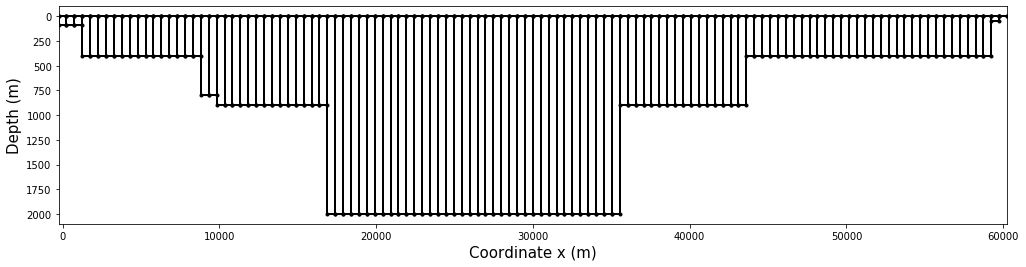

In [9]:
# Modelagem da bacia
x_prism, x_coord, z_coord = modeling.multi_prism(n_prism, xmin, xmax, zmin_sed, zmax_sed, index='all')

In [10]:
# Calculando a componente vertical da anomalia gravitacional ao longo do modelo de bacia
# Gerando as coordenadas dos pontos de observacoes
xo = np.linspace(xmin, xmax, n_prism) # coordenadas em x
yo = xo*0.0                           # coordenadas em y
zo = np.zeros(n_prism)                # coordenadas em z

# Considerando uma(s) desindade(s) para os prismas 
density = np.array([-0.24])

# Informacoes referentes aos prismas
deltax = 2.0 * x_prism
deltay = 1000.0
top = zmin_sed
bottom = zmax_sed
xprism = xo
yprism = np.zeros(n_prism)

# Calculando a componente vertical do campo gravitacional
gz_sed = prism.prism3D_gz(xo, yo, zo, xprism, yprism, top, bottom, deltax, deltay, density)

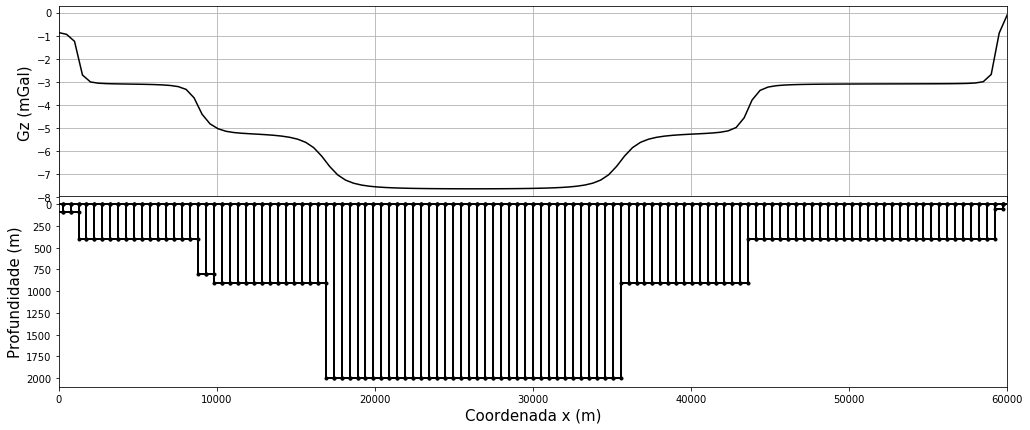

In [11]:
# Plotando
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(17, 7), facecolor='w', sharex=True, \
                                  gridspec_kw={'hspace': -0.01})

# Plot do sinal original
ax1.plot(xo, gz_sed, 'k-')
ax1.set_ylabel('Gz (mGal)', fontsize=15) # Determinando titulo para o eixo y
ax1.grid() # Estabelecendo linhas de grid da figura
ax1.set_xlim(0,60000) # Estabelecendo limites do eixo x

# Plot da modelagem do relevo de embasamento
for i in range (n_prism): # Plotando os diversos prismas que constituem o modelo
    ax2.plot(x_coord[i], z_coord[i], ".-k", linewidth=2)

ax2.set_ylabel('Profundidade (m)', fontsize=15) # Determinando titulo para o eixo y
ax2.set_xlabel('Coordenada x (m)', fontsize=15) # Determinando titulo para o eixo x
ax2.invert_yaxis() # Invertendo o eixo y

# Salvando figura
#plt.savefig('figs/Figura.png', format='png') # Salvando a figura em uma imagem PNG

# Visualizacao da figura
plt.show( )

In [12]:
# Gerando o ruido
media = 0 # media
std = 0.1 # desvio padrao
noise = np.random.normal(media, std, n_prism) 
noise

array([-0.12393316, -0.18645267, -0.00464169, -0.07490089,  0.04451486,
        0.05408404,  0.02472848, -0.08293639, -0.11659598, -0.12613901,
        0.10292104, -0.04181669,  0.09252185, -0.01200021,  0.07642198,
       -0.10739703, -0.00275939, -0.14944893, -0.00091268,  0.15661088,
        0.04599616, -0.03442813,  0.05500382,  0.06433669, -0.06414615,
        0.1283584 ,  0.09772573, -0.11639037,  0.06219244, -0.08825716,
        0.18544827,  0.09536502,  0.04770452, -0.03449613, -0.12088786,
        0.31583865,  0.00843186, -0.09063745,  0.01694208, -0.04051325,
       -0.14339866,  0.05268979, -0.02833501, -0.0684851 ,  0.21102262,
        0.05373207,  0.05984143,  0.05104301, -0.11348247,  0.01374036,
        0.00303568,  0.01330811, -0.05086589,  0.05146565, -0.13785661,
       -0.01320486,  0.1188921 ,  0.06344331, -0.01738207, -0.21552366,
        0.1558577 ,  0.0909515 , -0.16266953, -0.15558712,  0.04379799,
       -0.1116663 , -0.08389176, -0.10132781,  0.14921512, -0.03

In [13]:
# Aplicando ruido ao sinal
gz_sed_noise = gz_sed + noise

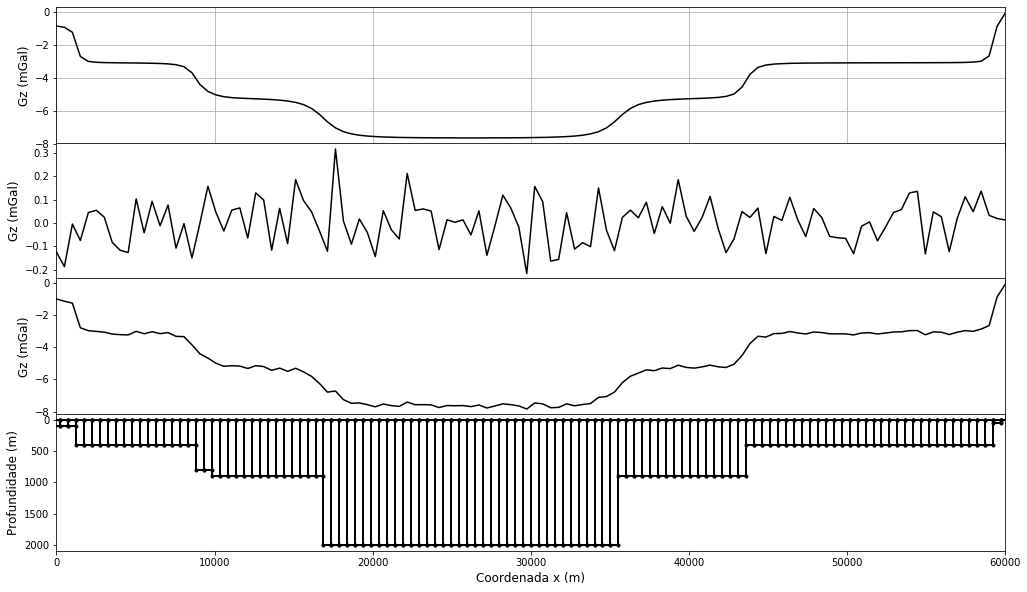

In [14]:
# Plotando
figure, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(17, 10), facecolor='w', sharex=True, \
                                  gridspec_kw={'hspace': -0.01})

# Plot do sinal original
ax1.plot(xo, gz_sed, 'k-')
ax1.set_ylabel('Gz (mGal)', fontsize=12) # Determinando titulo para o eixo y
ax1.grid() # Estabelecendo linhas de grid da figura
ax1.set_xlim(0,60000) # Estabelecendo limites do eixo x

# Plot do ruído gerado
ax2.plot(xo, noise, 'k-')
ax2.set_ylabel('Gz (mGal)', fontsize=12) # Determinando titulo para o eixo y

# Plot do sinal perturbado pelo ruído
ax3.plot(xo, gz_sed_noise, 'k-')
ax3.set_ylabel('Gz (mGal)', fontsize=12) # Determinando titulo para o eixo y

# Plot da modelagem do relevo de embasamento
for i in range (n_prism): # Plotando os diversos prismas que constituem o modelo
    ax4.plot(x_coord[i], z_coord[i], ".-k", linewidth=2)

ax4.set_ylabel('Profundidade (m)', fontsize=12) # Determinando titulo para o eixo y
ax4.set_xlabel('Coordenada x (m)', fontsize=12) # Determinando titulo para o eixo x
ax4.invert_yaxis() # Invertendo o eixo y

# Salvando figura
#plt.savefig('figs/Figura.png', format='png') # Salvando a figura em uma imagem PNG

# Visualizacao da figura
plt.show( )